In [1]:
import torch
import numpy as np
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from torch import nn

from models import Generator_28, Discriminator_28

device = 'cuda'


In [3]:
# fname = '../models/DCGAN_conditional_MNIST_weights_20211208_1741.pth'
fname = '../models/DCGAN_conditional_corrupted_MNIST_weights_20211208_1800.pth'
conditional = True if 'conditional' in fname else False

z_dim = 64
n_classes = 10 if conditional else 0
generator_input_dim = z_dim + n_classes

gen = Generator_28(generator_input_dim).to(device)
gen.load_state_dict(torch.load(fname))
gen.eval()

Generator_28(
  (gen): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(74, 256, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Sequential(
      (0): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2))
      (1): Tanh()
    )
  )
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


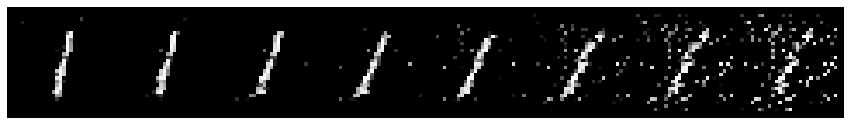

In [7]:
noise_1 = torch.randn(1, z_dim, 1, 1, device=device)
noise_2 = torch.randn(1, z_dim, 1, 1, device=device)
images = []
label = torch.tensor([1])

for alpha in np.linspace(0, 1, num=8):
    noise = (1-alpha)*noise_1 + alpha*noise_2
    if conditional:
        one_hot_labels = nn.functional.one_hot(label.to(device), n_classes)[:,:,None,None]
        noise = torch.cat((noise.float(), one_hot_labels.float()), dim=1)
    with torch.no_grad():
        fake = gen(noise).detach().cpu()
    images.append(fake)

images = torch.cat(images, 0)
vutils.make_grid(images).permute(1,2,0)

plt.figure(figsize=(15,3))
plt.axis("off")
plt.imshow(vutils.make_grid(images, pad_value=1).permute(1,2,0))